# The Sparks Foundation - Grip October 2022

## Data Science and Businuess Analytics Internship Oct 22.

### Task # 2: "Prediction Using Unsupervised Machine Learning, using Iris Dataset"

DataSet: https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view

Author: Muhammad Habib

Problem: From the given Iris Dataset, predict the optimum number of clusters and represent it visually

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing Data

In [2]:
df = pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### Performing EDA on the dataSet to have a better understanding of the data and prepare it for clustering

In [3]:
df.drop('Id' , axis = 1 , inplace= True)

In [4]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
df.shape

(150, 5)

In [7]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
df.nunique()

SepalLengthCm    35
SepalWidthCm     23
PetalLengthCm    43
PetalWidthCm     22
Species           3
dtype: int64

In [10]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

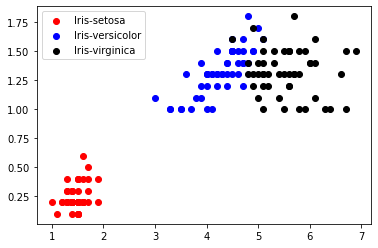

In [11]:
df1 = df[df['Species']=='Iris-setosa']
df2 = df[df['Species']=='Iris-versicolor']
df3 = df[df['Species']=='Iris-virginica']

plt.scatter(df1['PetalLengthCm'],df1['PetalWidthCm'], color = 'red' , label = 'Iris-setosa')
plt.scatter(df2['PetalLengthCm'],df2['PetalWidthCm'], color = 'blue' , label = 'Iris-versicolor')
plt.scatter(df3['PetalLengthCm'],df2['PetalWidthCm'], color = 'black' , label = 'Iris-virginica')

plt.legend()
plt.show()



### Finding Optimum number of Clusters using K-Means Classification in the Iris dataSet by using Elbow Technique

In [12]:
df_imp = df.iloc[:,0:4]
from sklearn.cluster import KMeans
k_meancal = range(1,10)
sse= []

for k in k_meancal:
    km = KMeans(n_clusters=k)
    km.fit(df_imp)
    sse.append(km.inertia_)

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
d:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [13]:
sse

[680.8243999999996,
 152.36870647733915,
 78.94084142614601,
 57.34540931571815,
 46.535582051282034,
 39.19708292889162,
 34.19846461871464,
 30.14490082956261,
 28.152740259740277]

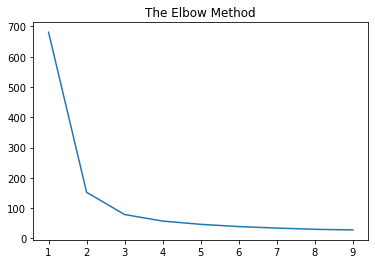

In [14]:
plt.title('The Elbow Method')
plt.plot(k_meancal,sse)
plt.show()

#### The elbow seems to bent at 3, so we will consider the no. of clusters= 3

### Creating and Training the Model

In [15]:
km1 = KMeans(n_clusters=3)
km1.fit(df_imp)

KMeans(n_clusters=3)

In [16]:
y_predicted = km1.fit_predict(df_imp)
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [17]:
df['cluster'] = y_predicted
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1


In [18]:
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
145,6.7,3.0,5.2,2.3,Iris-virginica,0
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,0
148,6.2,3.4,5.4,2.3,Iris-virginica,0
149,5.9,3.0,5.1,1.8,Iris-virginica,2


In [19]:
km1.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

In [20]:
df_imp = np.array(df_imp)

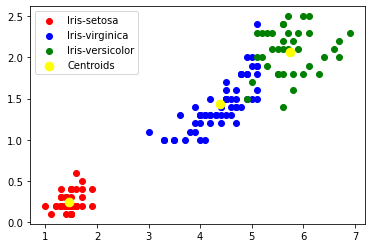

In [21]:
## Visualising the clusters - On the first two columns
plt.scatter(df_imp[y_predicted == 1,2],df_imp[y_predicted==1,3], color = 'red' , label = 'Iris-setosa')
plt.scatter(df_imp[y_predicted == 2,2],df_imp[y_predicted==2,3], color = 'blue' , label = 'Iris-virginica')
plt.scatter(df_imp[y_predicted == 0,2],df_imp[y_predicted==0,3], color = 'green' , label = 'Iris-versicolor')
plt.scatter(km1.cluster_centers_[:, 2], km1.cluster_centers_[:,3], 
            s = 75, c = 'yellow', label = 'Centroids')
plt.legend()
plt.show()